In [5]:
import csv
from constants import SEED
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_predict

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
albums = pd.read_csv('./embeddings/albums_embeddings_node2vec_DFS_60_10.csv', index_col='id', quoting=csv.QUOTE_ALL)
albums.embedding = albums.embedding.apply(lambda embedding: eval(embedding))

# Visualization

In [7]:
pca = PCA(n_components=2, random_state=SEED)
principal_components = pca.fit_transform(np.array(albums.embedding.tolist()))

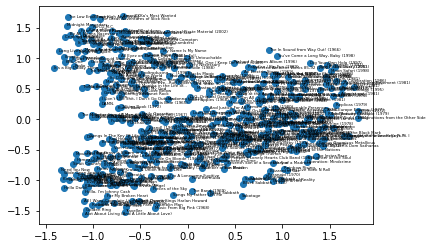

In [8]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for index, row in albums.iterrows():
    plt.annotate(row.title, (principal_components[index, 0], principal_components[index, 1]), fontsize=4)

plt.show()

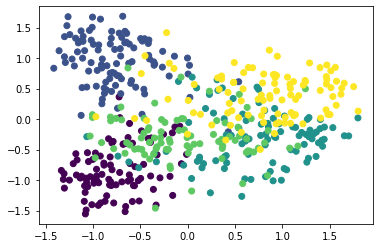

In [9]:
albums_labels = {label:index for index, label in enumerate(albums.label.unique())}
albums_colours = albums.label.map(albums_labels)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=albums_colours)
plt.show()

# Similarity

In [19]:
cos_similarity = cosine_similarity(np.array(albums.embedding.tolist()), np.array(albums.embedding.tolist()))

In [20]:
albums_index = 126
print(albums.iloc[albums_index].title)

closest_albums = cos_similarity[albums_index].argsort()[-6:][::-1]
for closest_album in closest_albums[1:]:
    print(albums.iloc[closest_album].title, cos_similarity[albums_index, closest_album])

Escape
Raising Hell 0.5850151742941444
How Ya Like Me Now 0.5589257538154067
King of Rock 0.5229726538960443
Run-D.M.C. 0.5155477819537763
Midnight Maruaders 0.5125672636424188


# Classification

In [21]:
X = np.array(albums.embedding.tolist())
y = albums_colours.to_numpy()

logistic_classifier = LogisticRegression(multi_class='ovr', random_state=SEED)
predicted = cross_val_predict(logistic_classifier, X, y, cv=10)

In [22]:
print(classification_report(y, predicted, target_names=albums.label.unique()))

              precision    recall  f1-score   support

     country       0.91      0.95      0.93        93
         rap       0.95      0.94      0.94       100
       metal       0.94      0.94      0.94       100
        rock       0.82      0.80      0.81        86
  electronic       0.86      0.85      0.85        99

    accuracy                           0.90       478
   macro avg       0.90      0.90      0.90       478
weighted avg       0.90      0.90      0.90       478

